In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold , SelectKBest ,f_classif
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin ,BaseEstimator
from sklearn import tree 
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split


In [3]:
data=pd.read_csv("USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
data.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [8]:
discrete=data.select_dtypes(include=["int64"]).columns
discrete

Index([], dtype='object')

In [9]:
continous=data.select_dtypes(include=["float64"]).columns
continous

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [11]:
objected=data.select_dtypes("object").columns
objected

Index(['Address'], dtype='object')

In [13]:
data["Address"].value_counts().head(10)

Address
208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
314 Christopher Square Apt. 404\nLake Ronaldville, SD 42025      1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
481 Kaitlin Mission Apt. 309\nJodystad, IA 16947                 1
PSC 3528, Box 7580\nAPO AE 08696-0234                            1
242 Mark Common Apt. 060\nJohnside, SD 09329-2233                1
94939 John Mill Apt. 765\nNew Scott, KS 61292                    1
89265 Robert Haven Apt. 492\nSmithburgh, FM 58565-1105           1
93529 Bartlett Ridges\nLeeview, AS 96540-6448                    1
Name: count, dtype: int64

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_7556\180957772.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Area Population"])


<AxesSubplot:xlabel='Area Population', ylabel='Density'>

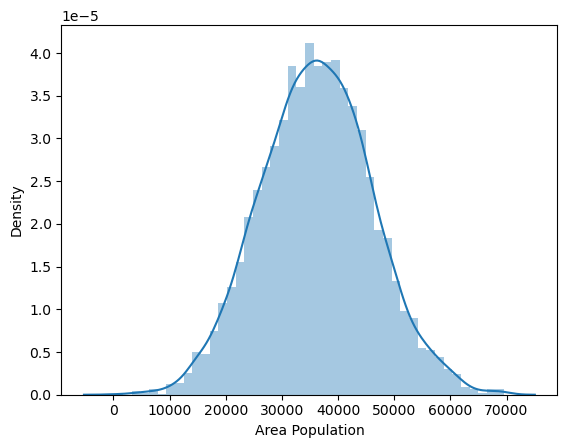

In [14]:
sns.distplot(data["Area Population"])

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_7556\1131271902.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Avg. Area House Age"],shade=True)


<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Density'>

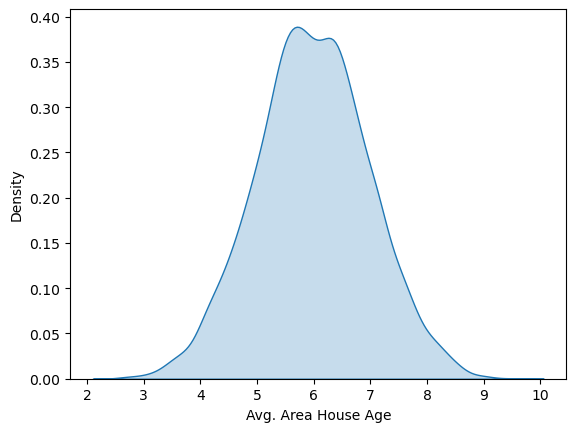

In [15]:
sns.kdeplot(data["Avg. Area House Age"],shade=True)

<AxesSubplot:ylabel='Density'>

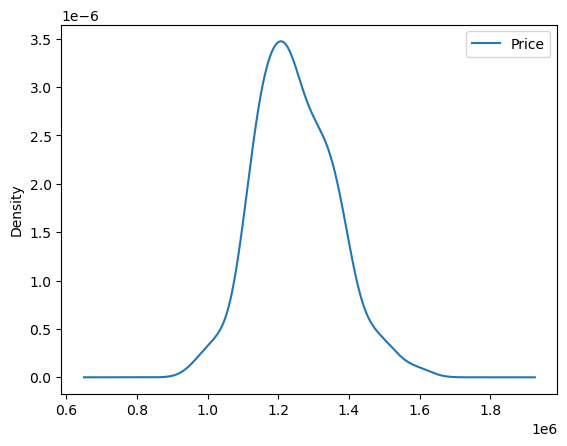

In [20]:
data.groupby(["Avg. Area Number of Bedrooms"])["Price"].mean().sort_values(ascending=True).plot(kind="kde",legend=True)

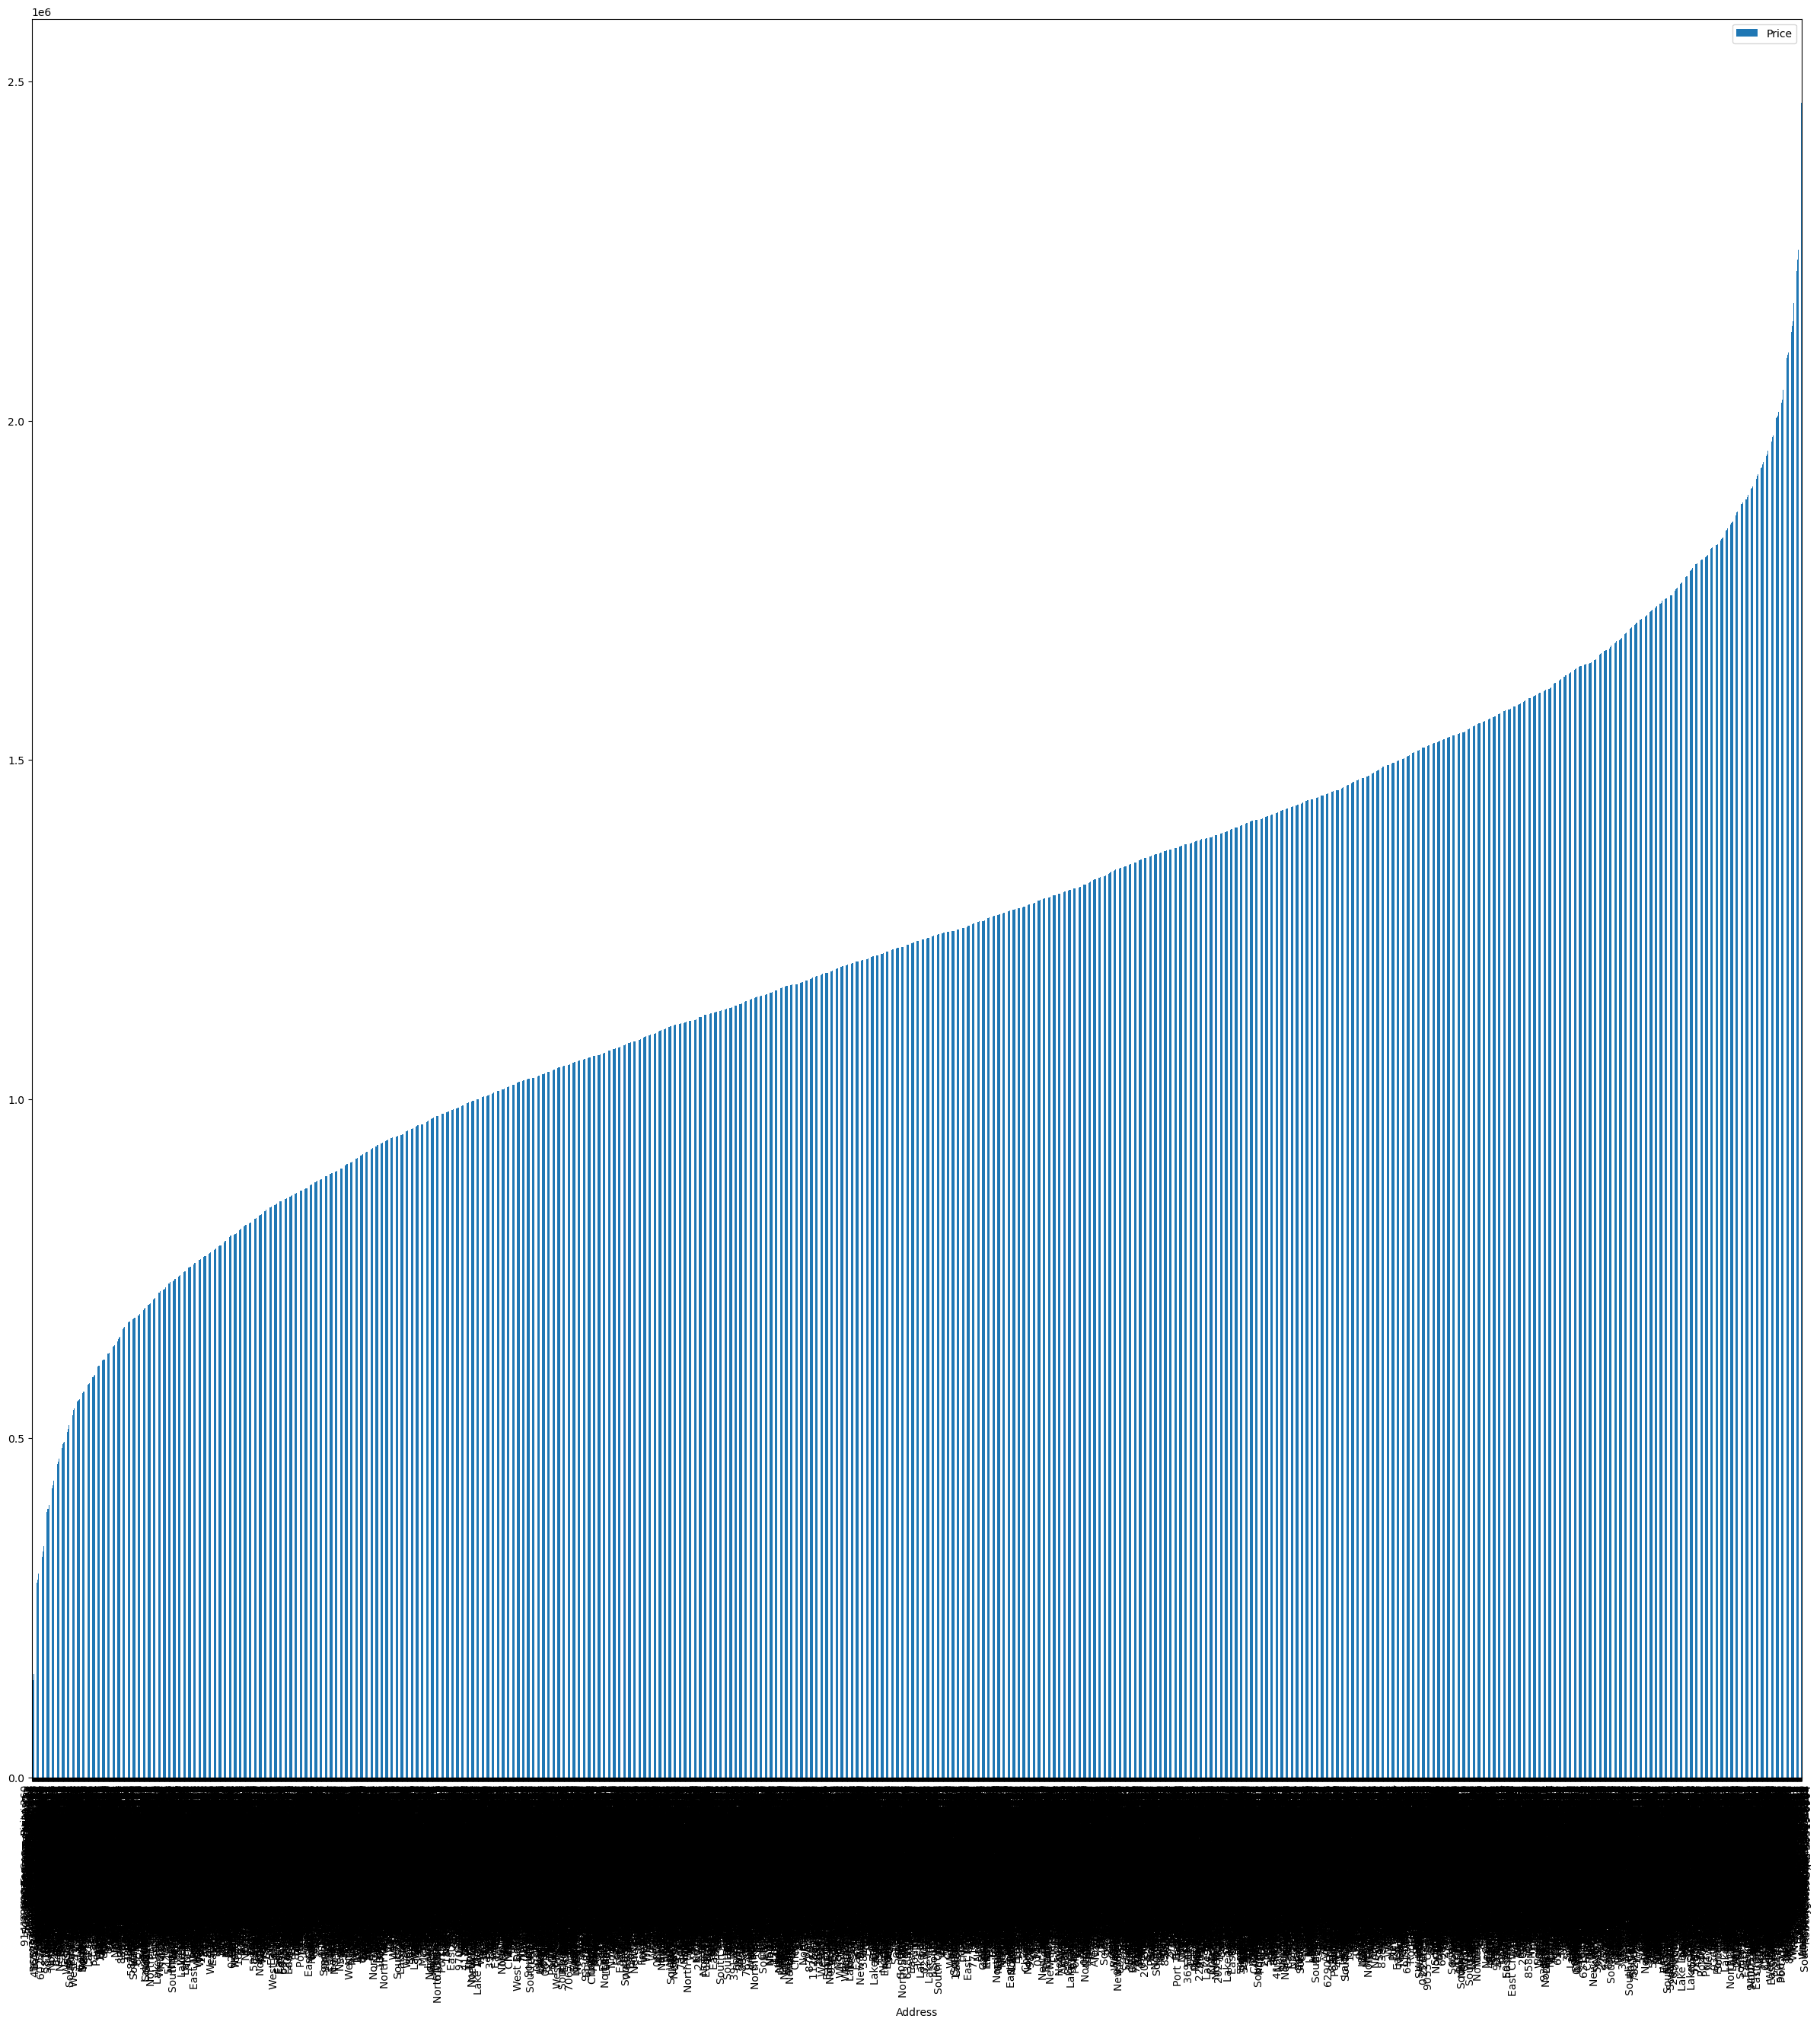

In [54]:
plt.figure(figsize=(30,30))
data.groupby(["Address"])["Price"].mean().sort_values(ascending=True).plot(kind="bar",legend=True)
plt.show()

In [22]:
data.isna().mean()

Avg. Area Income                0.0
Avg. Area House Age             0.0
Avg. Area Number of Rooms       0.0
Avg. Area Number of Bedrooms    0.0
Area Population                 0.0
Price                           0.0
Address                         0.0
dtype: float64

In [55]:
data=data.fillna({
    "Area Population":data["Area Population"].median(),
    "Avg. Area Income":data["Avg. Area Income"].median()
                 })

In [56]:
data.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [23]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<AxesSubplot:xlabel='Area Population'>

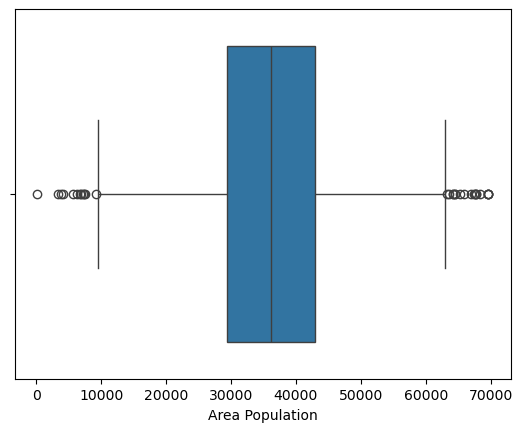

In [24]:
# check the outliers in Area population:

sns.boxplot(x=data["Area Population"])
# there in this column alittle outlier

<AxesSubplot:xlabel='Area Population'>

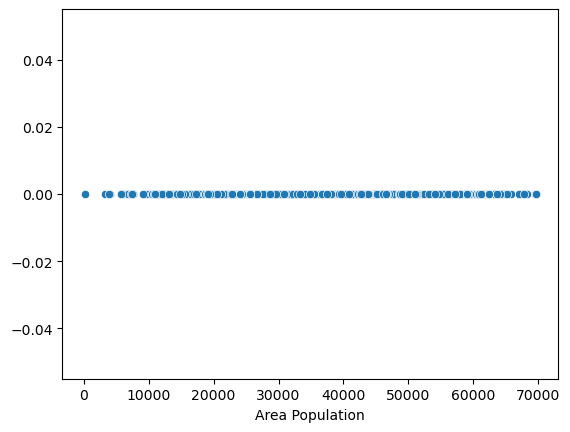

In [26]:
sns.scatterplot(x=data["Area Population"],y=np.zeros_like(data["Area Population"]))

<AxesSubplot:xlabel='Avg. Area Income'>

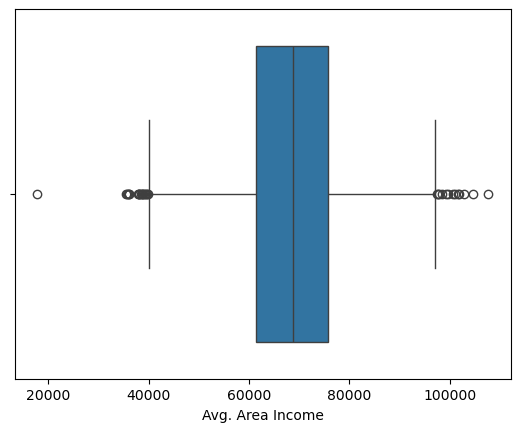

In [28]:
sns.boxplot(x=data["Avg. Area Income"])
# there alittle outliers:

<AxesSubplot:xlabel='Avg. Area Income'>

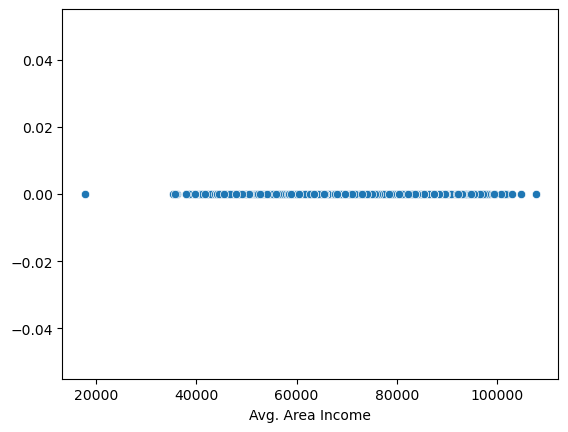

In [29]:
sns.scatterplot(x=data["Avg. Area Income"],y=np.zeros_like(data["Area Population"]))

In [30]:
# calc the outlier for Avg.Area income:

Q1,Q3=data["Avg. Area Income"].quantile([0.25,0.75])
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

outlier=[]

for x in data["Avg. Area Income"]:
    if((x<low_limit) or (x>upper_limit)):
        outlier.append(x)

In [31]:
print("Q1_Avg. Area Income",Q1)
print("Q3_Avg. Area Income",Q3)
print("IQR_Avg. Area Income",IQR)
print("low_limit_Avg. Area Income",low_limit)
print("upper_limit_Avg. Area Income",upper_limit)
print("outliers_Avg. Area Income",outlier)

Q1_Avg. Area Income 61480.562388460974
Q3_Avg. Area Income 75783.33866615265
IQR_Avg. Area Income 14302.776277691672
low_limit_Avg. Area Income 40026.39797192346
upper_limit_Avg. Area Income 97237.50308269015
outliers_Avg. Area Income [39033.809236982364, 17796.631189543397, 36100.444226680745, 99629.01358134775, 107701.74837763936, 39411.652787814426, 101928.85805987818, 97548.31041260507, 37971.20756623529, 35963.330809062856, 39294.036523316114, 104702.7242570266, 101144.3239296864, 38139.919044520015, 35608.986237077515, 38868.25031141422, 98468.2536411164, 38734.005216471945, 101599.6705804352, 35454.714659475445, 38571.963669753466, 38122.524488262905, 97881.58727937556, 102881.12090226932, 97669.06449084358, 100741.29858525375, 99317.82314540035, 39777.606906208486, 38530.12447825256, 39653.77003073781, 37908.67586272925, 35797.323121548245]


In [34]:
len(outlier)

32

In [36]:
num_cols=data.select_dtypes("number").columns
num_cols

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [35]:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))
selector.get_support(indices=True)

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


array([0, 1, 2, 3, 4, 5], dtype=int64)

In [38]:
num_cols[selector.get_support(indices=True)]

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [39]:
df=data.T
duplicates_features=df.duplicated().sum()
print(duplicates_features)
data.drop_duplicates()

0


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [45]:
from sklearn.feature_selection import SelectKBest ,f_classif

fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="Avg. Area Income").select_dtypes("number").fillna(0),data["Avg. Area Income"])


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\Jupter\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


SelectKBest(k=5)

In [43]:
print(["{:10f}"].format(p) for p in fs.pvalues_)
print(["{:10f}"].format(p) for p in fs.scores_)

<generator object <genexpr> at 0x0000027037269970>
<generator object <genexpr> at 0x0000027037269970>


In [46]:
pvalues_features=pd.DataFrame(fs.pvalues_)
scores_features=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="Avg. Area Income").select_dtypes("number").fillna(0).columns)
feature_scores=pd.concat([pvalues_features,scores_features,features],axis=1)
feature_scores.columns=["pvalues","scores","inputs"]
feature_scores

,pvalues,scores,inputs
0,NaN,NaN,Avg. Area House Age
1,NaN,NaN,Avg. Area Number of Rooms
2,NaN,NaN,Avg. Area Number of Bedrooms
3,NaN,NaN,Area Population
4,NaN,NaN,Price


In [47]:
data.select_dtypes("number").corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


Text(0.5, 1.0, 'Correlation MAtrix Heatmap')

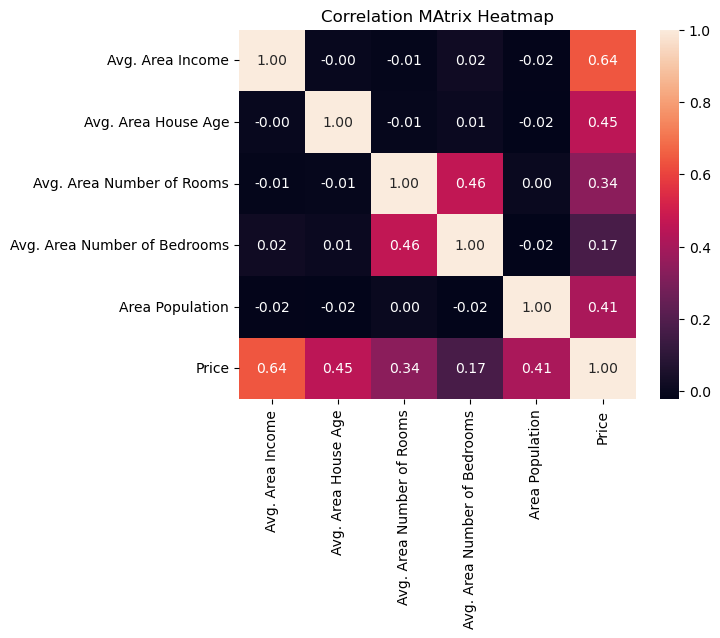

In [49]:
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f")
plt.title("Correlation MAtrix Heatmap")

In [50]:
data.select_dtypes("number").corr(method="pearson")

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [51]:
data.select_dtypes("number").corr(method="spearman")

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.001651,-0.018467,0.016115,-0.011165,0.619962
Avg. Area House Age,-0.001651,1.000000,-0.005198,0.006941,-0.012077,0.442725
Avg. Area Number of Rooms,-0.018467,-0.005198,1.000000,0.474590,0.002518,0.317924
Avg. Area Number of Bedrooms,0.016115,0.006941,0.474590,1.000000,-0.022362,0.158173
Area Population,-0.011165,-0.012077,0.002518,-0.022362,1.000000,0.394649
Price,0.619962,0.442725,0.317924,0.158173,0.394649,1.000000


In [53]:
data.select_dtypes("number").corr(method="kendall")

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.000949,-0.012423,0.010662,-0.007498,0.440770
Avg. Area House Age,-0.000949,1.000000,-0.003426,0.004646,-0.007987,0.303467
Avg. Area Number of Rooms,-0.012423,-0.003426,1.000000,0.316081,0.001690,0.215957
Avg. Area Number of Bedrooms,0.010662,0.004646,0.316081,1.000000,-0.014843,0.105429
Area Population,-0.007498,-0.007987,0.001690,-0.014843,1.000000,0.269612
Price,0.440770,0.303467,0.215957,0.105429,0.269612,1.000000


In [73]:
data=pd.get_dummies(data,dtype=float)
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,"Address_000 Adkins Crescent\nSouth Teresa, AS 49642-1348","Address_000 Todd Pines\nAshleyberg, KY 90207-1179","Address_001 Steve Plaza\nJessicastad, UT 25190","Address_0010 Gregory Loaf\nSouth Ericfort, VA 34651-0718",...,Address_Unit 9446 Box 0958\nDPO AE 97025,Address_Unit 9463 Box 0963\nDPO AE 49984-2796,Address_Unit 9494 Box 2307\nDPO AE 58622,Address_Unit 9664 Box 1605\nDPO AA 30902,Address_Unit 9732 Box 1846\nDPO AE 69898-3304,Address_Unit 9774 Box 4511\nDPO AE 44963,Address_Unit 9778 Box 2114\nDPO AP 59374,Address_Unit 9785 Box 0790\nDPO AP 60371-0797,Address_Unit 9831 Box 7128\nDPO AA 54705,Address_Unit 9871 Box 9037\nDPO AP 37275-9289
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
data=data.drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [75]:
x=data.drop("Price",axis=1)
y=data["Price"]


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [77]:
from sklearn import tree


In [78]:
model=tree.DecisionTreeClassifier(max_depth=4,random_state=42)


In [79]:
model.fit(x_train,y_train)

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


ValueError: Unknown label type: 'continuous'

In [ ]:
model.scorE9)